# specMACS cloudmask

The following script exemplifies the access and usage of specMACS data measured 
during EUREC4A.  

More information on the dataset can be found at https://macsserver.physik.uni-muenchen.de/campaigns/EUREC4A/products/cloudmask/. If you have questions or if you would like to use the data for a publication, please don't hesitate to get in contact with the dataset authors as stated in the dataset attributes `contact` and `author` list.


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Get data
* To load the data we first load the EUREC4A meta data catalogue. More information on the catalog can be found [here](https://github.com/eurec4a/eurec4a-intake#eurec4a-intake-catalogue).

In [2]:
import eurec4a

In [3]:
cat = eurec4a.get_intake_catalog()
list(cat)

['radiosondes', 'barbados', 'HALO', 'P3', 'swifts', 'dropsondes']

* We can funrther specify the platform, instrument, if applicable dataset level or variable name, and pass it on to dask.

*Note: have a look at the attributes of the xarray dataset `ds` for all relevant information on the dataset, such as author, contact, or citation infromation.*

In [4]:
ds = cat.HALO.specMACS.cloudmaskSWIR["HALO-0205"].to_dask()
ds

<xarray.Dataset>
Dimensions:                              (angle: 318, radiation_wavelength: 1, time: 894383)
Coordinates:
  * angle                                (angle) float64 18.0 17.9 ... -17.27
  * time                                 (time) datetime64[ns] 2020-02-05T10:...
  * radiation_wavelength                 (radiation_wavelength) float64 1.601...
Data variables:
    cloud_mask                           (time, angle) uint8 dask.array<chunksize=(894383, 318), meta=np.ndarray>
    brightness_cloud_mask                (time, angle) uint8 dask.array<chunksize=(894383, 318), meta=np.ndarray>
    vaz                                  (time, angle) float32 dask.array<chunksize=(894383, 318), meta=np.ndarray>
    vza                                  (time, angle) float32 dask.array<chunksize=(894383, 318), meta=np.ndarray>
    saz                                  (time) float32 dask.array<chunksize=(894383,), meta=np.ndarray>
    sza                                  (time) float32 dask.array<chunksize=(894383,), meta=np.ndarray>
    swir_radiance                        (time, angle, radiation_wavelength) float32 dask.array<chunksize=(894383, 318, 1), meta=np.ndarray>
    combined_brightness_watervapor_mask  (time, angle) uint8 dask.array<chunksize=(894383, 318), meta=np.ndarray>
Attributes:
    title:                 cloud mask derived from specMACS SWIR camera data ...
    platform_id:           HALO
    variable_id:           cloud_mask
    campaign_id:           EUREC4A
    instrument_id:         specMACS
    research_flight_date:  2020-02-05
    institution:           LMU Munich, Meteorological Institute
    source:                airborne hyperspectral imaging with specMACS camer...
    history:               the original version of the cloud mask was audited...
    contact:               veronika.poertge@physik.uni-muenchen.de
    citation:              please contact the authors if you want to use the ...
    time_id:               20200205T100000-20200205T182359
    _NCProperties:         version=2,netcdf=4.6.3,hdf5=1.10.4
    date_last_revised:     2020-07-21
    version_id:            1.1
    author:                Veronika Pörtge, Felix Gödde, Tobias Kölling, Lind...
    description:           more information about the product can be found he...

## Load HALO flight phase information
All HALO flights were split up into flight phases or segments to allow for a precise selection in time and space of a circle or calibration pattern. For more information have a look at the respective [github repository](https://github.com/eurec4a/halo-flight-phase-separation).

In [5]:
meta = eurec4a.get_flight_segments()

We further select the first straight leg on February 5 by it's `segment_id`.

In [6]:
segments = {s["segment_id"]: {**s, "flight_id": flight["flight_id"]}
             for platform in meta.values()
             for flight in platform.values()
             for s in flight["segments"]
            }
seg = segments["HALO-0205_sl1"]

We transfer the information from our flight segment selection to the specMACS data in the xarray dataset.

In [7]:
ds_selection = ds.sel(time=slice(seg["start"], seg["end"]))

## Plots
Figure 1: shows the SWIR camera cloud mask product along the flight track (x axis) for all observations in accross track directions (y axis).  

You can get a list of available variables in the dataset from `ds_selection.variables.keys()`  
*Note: fetching the data and displaying it might take a few seconds*

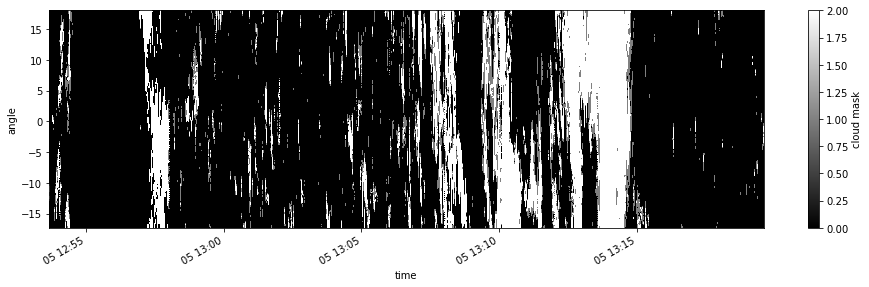

In [10]:
fig, ax = plt.subplots(figsize=(16,4))
ds_selection.cloud_mask.T.plot(ax=ax, cmap="gray")

## Conversion from carmera view angles to latitude and longitude

* (we are working on a conversion and will post it here asap...)